In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
gmsc_train=pd.read_table('./Give Me Some Credit/cs-training.csv',sep=',')
gmsc_test=pd.read_table('./Give Me Some Credit/cs-test.csv',sep=',')

In [3]:
gmsc_train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
gmsc_train=gmsc_train.drop(columns=['Unnamed: 0'])

In [5]:
gmsc_train['SeriousDlqin2yrs'].value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [6]:
print(gmsc_train.isnull().sum())

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [7]:
gmsc_train.fillna(method='bfill',inplace=True)

In [8]:
gmsc_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         150000 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    150000 non-null  float64
dtype

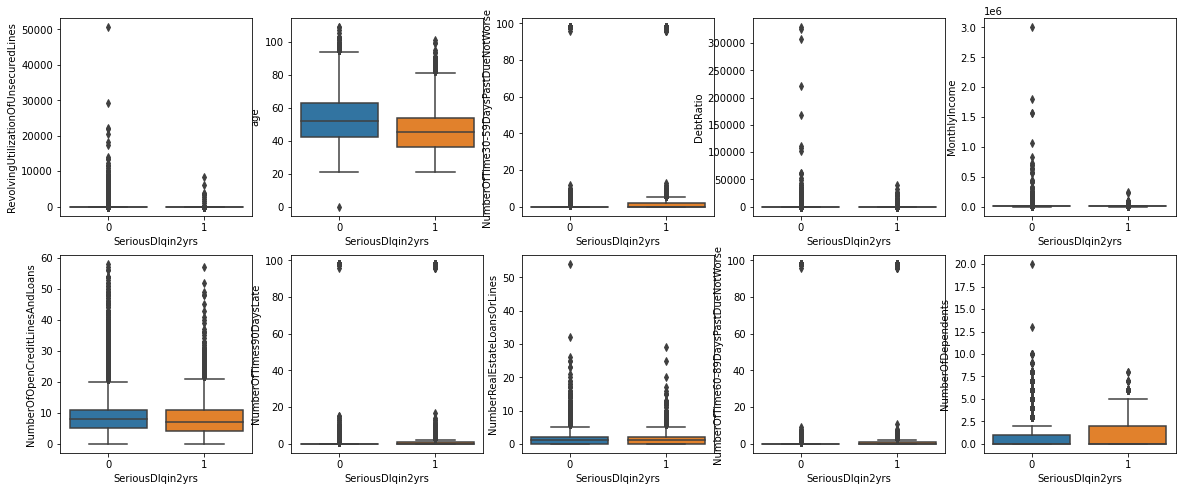

In [10]:
gmsc_cate=gmsc_train.copy(deep=True)
gmsc_cate=gmsc_cate[['RevolvingUtilizationOfUnsecuredLines','age','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberOfTimes90DaysLate','NumberRealEstateLoansOrLines','NumberOfTime60-89DaysPastDueNotWorse','NumberOfDependents','SeriousDlqin2yrs']]
fig, ax = plt.subplots(2, 5, figsize=(20, 8))
for i in range(2):
    for j in range(5):
        sns.boxplot(x='SeriousDlqin2yrs',y=gmsc_cate.iloc[:,i*5+j],data=gmsc_cate, ax=ax[i,j])

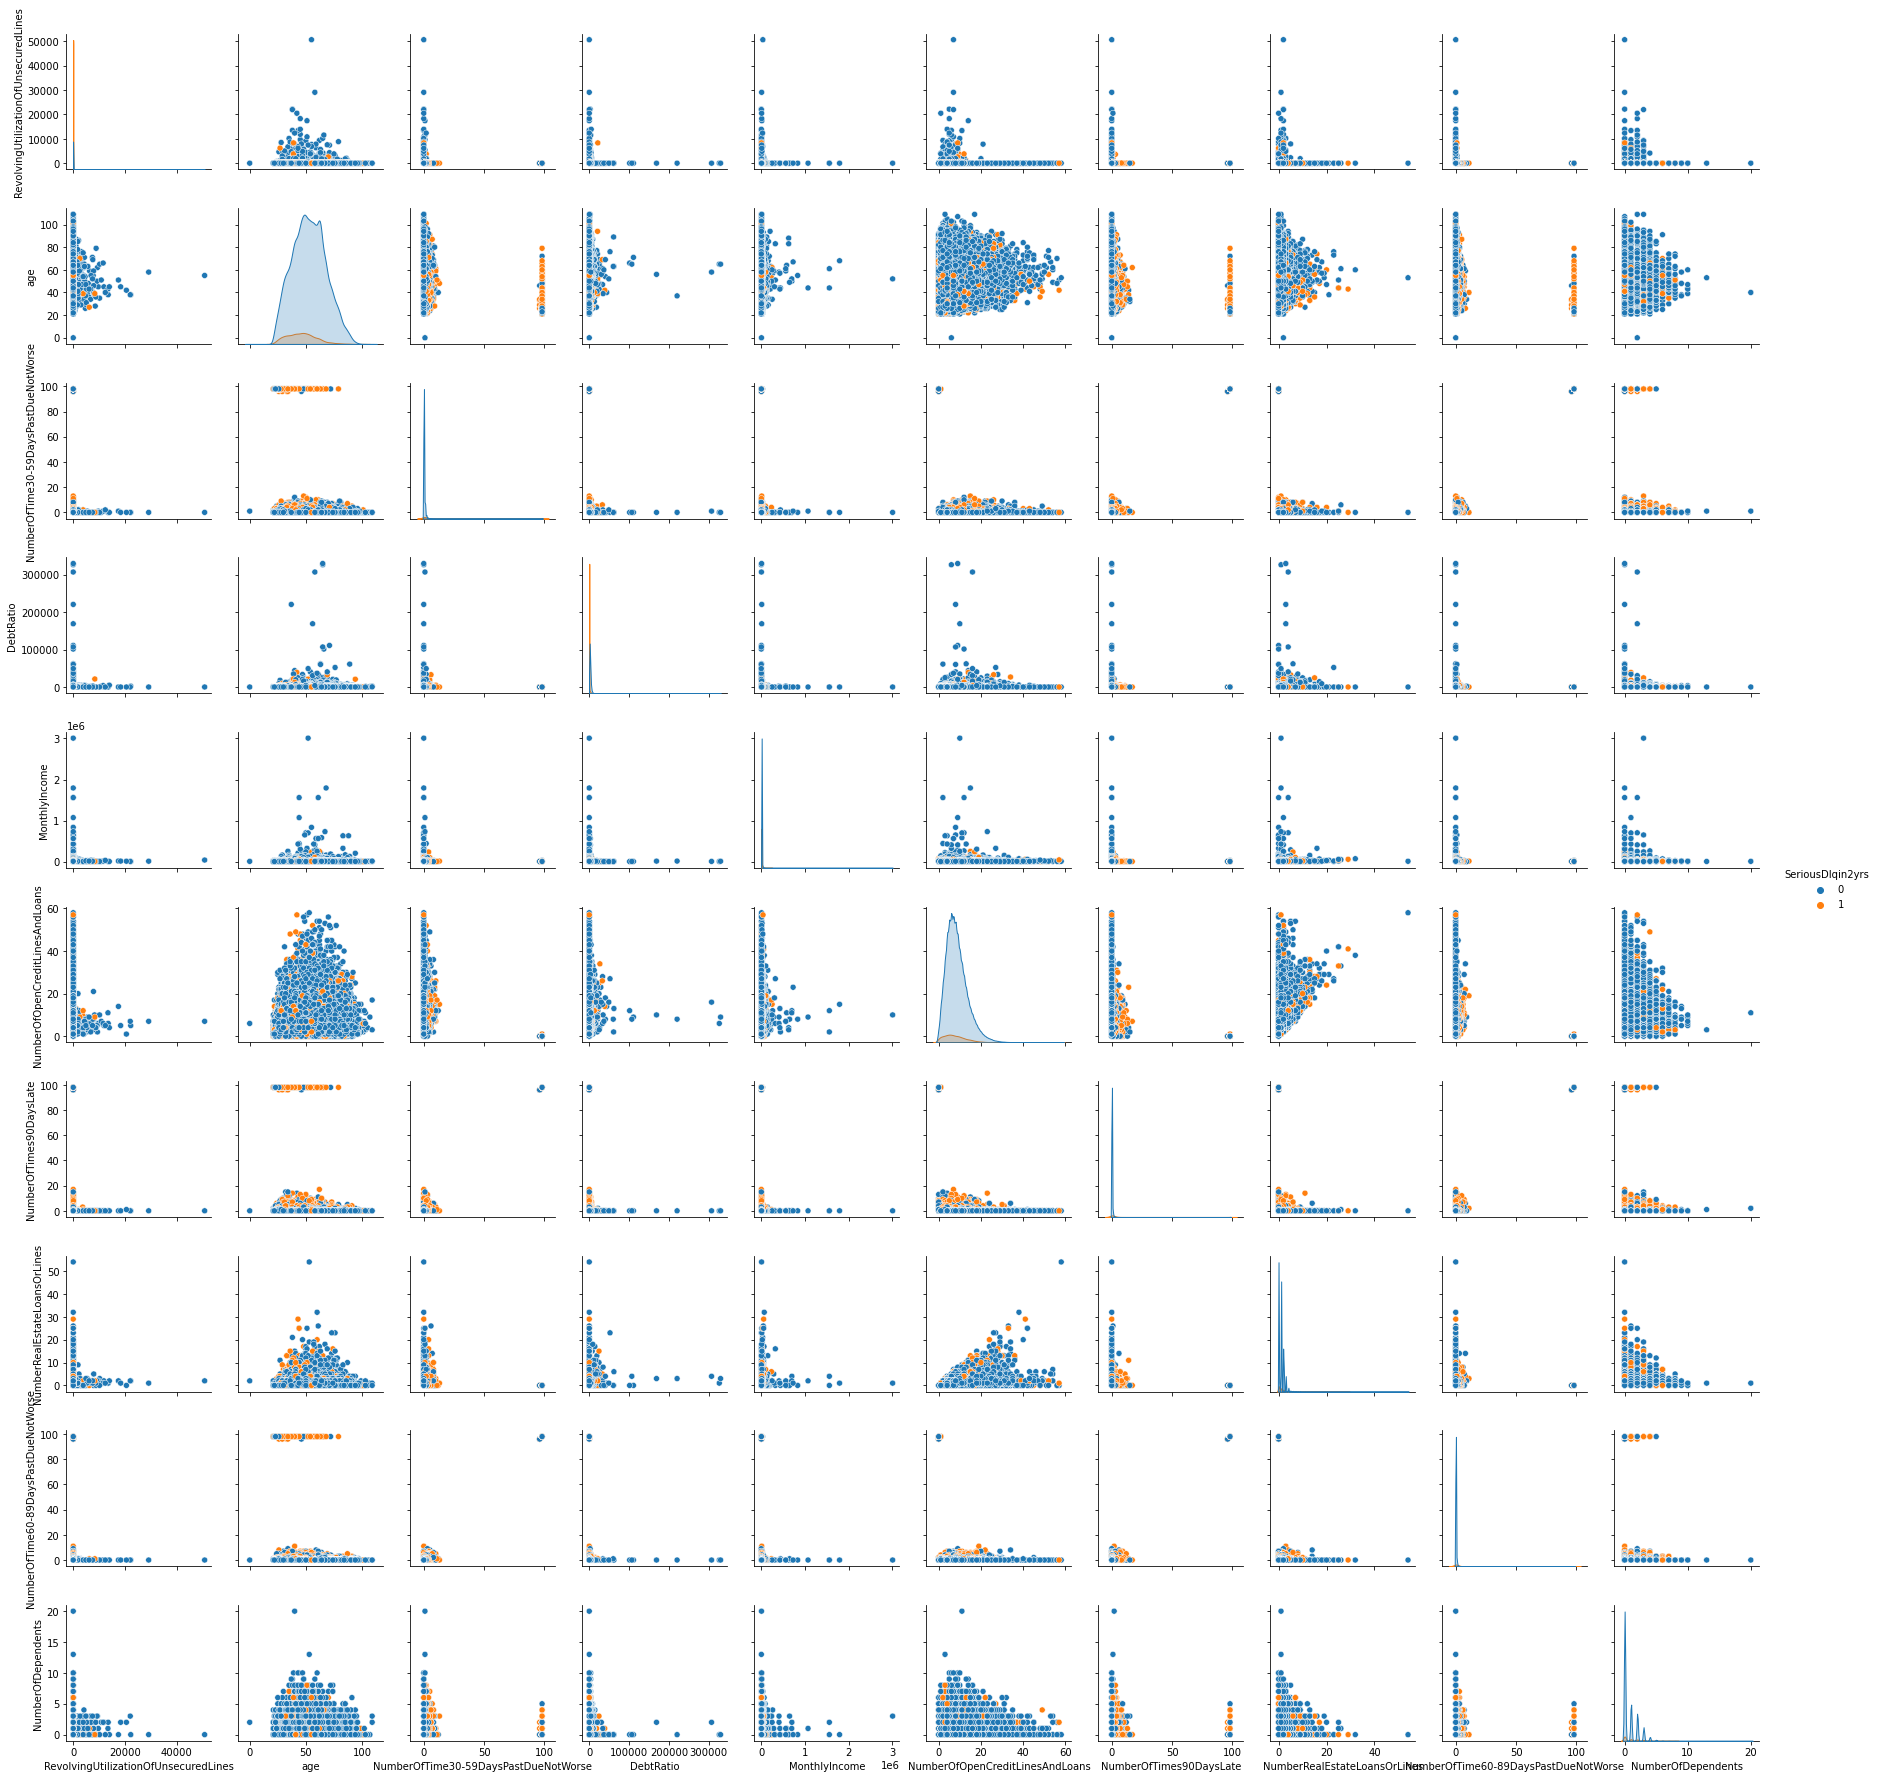

In [21]:
sns.pairplot(gmsc_cate,hue="SeriousDlqin2yrs")

In [11]:
gmsc_cate.corr()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
RevolvingUtilizationOfUnsecuredLines,1.000000,-0.005898,-0.001314,0.003961,0.006429,-0.011281,-0.001061,0.006235,-0.001048,0.001595,-0.001802
age,-0.005898,1.000000,-0.062995,0.024188,0.031691,0.147705,-0.061005,0.033150,-0.057159,-0.205216,-0.115386
NumberOfTime30-59DaysPastDueNotWorse,-0.001314,-0.062995,1.000000,-0.006542,-0.007527,-0.055312,0.983603,-0.030565,0.987005,-0.002971,0.125587
DebtRatio,0.003961,0.024188,-0.006542,1.000000,-0.006680,0.049565,-0.008320,0.120046,-0.007533,-0.038092,-0.007602
MonthlyIncome,0.006429,0.031691,-0.007527,-0.006680,1.000000,0.073727,-0.009168,0.103331,-0.008056,0.053814,-0.016421
NumberOfOpenCreditLinesAndLoans,-0.011281,0.147705,-0.055312,0.049565,0.073727,1.000000,-0.079984,0.433959,-0.071077,0.064037,-0.029669
NumberOfTimes90DaysLate,-0.001061,-0.061005,0.983603,-0.008320,-0.009168,-0.079984,1.000000,-0.045205,0.992796,-0.009951,0.117175
NumberRealEstateLoansOrLines,0.006235,0.033150,-0.030565,0.120046,0.103331,0.433959,-0.045205,1.000000,-0.039722,0.122465,-0.007038
NumberOfTime60-89DaysPastDueNotWorse,-0.001048,-0.057159,0.987005,-0.007533,-0.008056,-0.071077,0.992796,-0.039722,1.000000,-0.010625,0.102261
NumberOfDependents,0.001595,-0.205216,-0.002971,-0.038092,0.053814,0.064037,-0.009951,0.122465,-0.010625,1.000000,0.045368


In [8]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [9]:
gmsc_pre=gmsc_train.copy(deep=True)
gmsc_pre=gmsc_pre.drop(columns=['SeriousDlqin2yrs'])
pre_gmsc=StandardScaler().fit_transform(gmsc_pre)
pre_gmsc=pd.DataFrame(pre_gmsc,columns = gmsc_pre.select_dtypes(include='number').columns)
pre_gmsc=pd.concat([pre_gmsc, gmsc_train[['SeriousDlqin2yrs']]], axis=1)

In [10]:
from sklearn.ensemble import RandomForestClassifier
X, y = pre_gmsc.loc[:, np.delete(pre_gmsc.columns.values, 
                                        np.where(pre_gmsc.columns.values == ['SeriousDlqin2yrs']))], \
        pre_gmsc.loc[:, 'SeriousDlqin2yrs']

# train on randomForest to get important features
clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
clf.fit(X, y) 

feature_importances = pd.DataFrame(sorted(zip(pre_gmsc.columns, clf.feature_importances_), key=lambda x: x[1] * -1),
                                    columns = ['feature','importance'])


In [11]:
print(feature_importances)

                                feature  importance
0               NumberOfTimes90DaysLate    0.407143
1  NumberOfTime60-89DaysPastDueNotWorse    0.239472
2  RevolvingUtilizationOfUnsecuredLines    0.172730
3  NumberOfTime30-59DaysPastDueNotWorse    0.145676
4                                   age    0.018237
5       NumberOfOpenCreditLinesAndLoans    0.013146
6          NumberRealEstateLoansOrLines    0.001760
7                         MonthlyIncome    0.000979
8                             DebtRatio    0.000781
9                    NumberOfDependents    0.000077


In [12]:
top_features = feature_importances[feature_importances.importance>0]['feature'].values

X, y = pre_gmsc.loc[:,top_features], pre_gmsc.loc[:,'SeriousDlqin2yrs']

In [13]:
y=y*(-1)+1

In [14]:
from sklearn.model_selection import train_test_split, KFold,cross_val_score,StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE

In [15]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify = y)
sm = SMOTE(random_state=0,sampling_strategy=1)
x_train_b, y_train_b = sm.fit_resample(x_train, y_train.ravel())

In [16]:
unique, counts = np.unique(y_train_b, return_counts=True)
dict(zip(unique, counts))

{0: 111979, 1: 111979}

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score, recall_score, precision_score,make_scorer,confusion_matrix,brier_score_loss,accuracy_score
from sklearn import metrics
from scipy.stats import ks_2samp

In [18]:
def ks_stat(y, yhat):
    return ks_2samp(yhat[y==1], yhat[y!=1]).statistic

In [19]:
def type2_calcu(y,yhat):
    confusion =confusion_matrix(y,yhat)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return FP / float(FP + TN)
def type1_calcu(y,yhat):
    confusion =confusion_matrix(y,yhat)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    return FN / float(TP + FN)

In [20]:
import xgboost as xgb
import lightgbm as lgb

In [21]:
def scores(model):
    train=[]
    test=[]
    y_train_c=model.predict(x_train)
    y_train_pre=model.predict_proba(x_train)
    y_pred_c=model.predict(x_test)
    y_pred = model.predict_proba(x_test)
    #roc
    train.append(roc_auc_score(y_train,y_train_pre[:,1]))
    test.append(roc_auc_score(y_test, y_pred[:, 1]))
    #ks
    train.append(ks_stat(y_train,y_train_pre[:,1]))
    test.append(ks_stat(y_test, y_pred[:, 1]))
    #brier
    train.append(brier_score_loss(y_train,y_train_pre[:,1]))
    test.append(brier_score_loss(y_test, y_pred[:, 1]))
    #acc
    train.append(accuracy_score(y_train,y_train_c))
    test.append(accuracy_score(y_test, y_pred_c))
    #t1
    train.append(type1_calcu(y_train,y_train_c))
    test.append(type1_calcu(y_test, y_pred_c))
    #t2
    train.append(type2_calcu(y_train,y_train_c))
    test.append(type2_calcu(y_test, y_pred_c))
    return train,test

In [22]:
print(y_train.isnull().sum())

0


In [24]:
models=[]
xgb_params = {'learning_rate': [0.01],'max_depth': [2],'subsample': [0.5]}
svc_params = {'kernel':['linear'], 'C':[1,10]}
lr_params={'penalty':('l1','l2'),'C':np.logspace(-2,2,10,base=10)}
dt_params={'max_depth':[2,4,6,8,10,12],'min_samples_leaf':[1,3,5,7]}
rf_params={'max_depth': [2,8,10,14],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators':[1,5,10,15,20]}
nb_p={}
models.append(('svc',svc_params,SVC(probability=True,max_iter=100)))
models.append(('xgb',xgb_params,xgb.XGBClassifier()))
models.append(('LR',lr_params,LogisticRegression()))
models.append(('DT',dt_params,DecisionTreeClassifier()))
models.append(('RF',rf_params,RandomForestClassifier()))
models.append(('nb',nb_p,GaussianNB()))

results=[]
for model_name, parameters, model in models:
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1234)
    clf = GridSearchCV(model, parameters, cv=skf,scoring='roc_auc')
    clf.fit(x_train, y_train)
    print('For ',model_name,', the best parameters: ', clf.best_params_)
    results.append(scores(clf))
    
results=pd.DataFrame(results)

/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: Conv

For  svc , the best parameters:  {'C': 1, 'kernel': 'linear'}
For  xgb , the best parameters:  {'learning_rate': 0.01, 'max_depth': 2, 'subsample': 0.5}


/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61, 

For  LR , the best parameters:  {'C': 0.0774263682681127, 'penalty': 'l2'}
For  DT , the best parameters:  {'max_depth': 6, 'min_samples_leaf': 7}
For  RF , the best parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}
For  nb , the best parameters:  {}


In [25]:
results.columns=list('xc')
def split_col(data, columns):
    for c in columns:
        new_col = data.pop(c)
        max_len = max(list(map(len, new_col.values)))  # 最大长度
        new_col = new_col.apply(lambda x: x + [None]*(max_len - len(x)))  # 补空值，None可换成np.nan
        new_col = np.array(new_col.tolist()).T  # 转置
        for i, j in enumerate(new_col):
            data[c + str(i)] = j


split_col(results, columns=['x','c'])
colnames=['train_auc','train_k-s','train_brier','train_acc','train_t1','train_t2','test_auc','test_k-s','test_brier','test_acc','test_t1','test_t2']
results.columns=colnames
results.to_csv('unbalanced-gmsc.csv')

In [26]:
x_train=x_train_b
y_train=y_train_b

In [28]:
models=[]
xgb_params = {'learning_rate': [0.01],'max_depth': range(1,10),'subsample': [0.5]}
svc_params = {'kernel':['linear'], 'C':[1]}
lr_params={'penalty':('l1','l2'),'C':np.logspace(-2,2,10,base=10)}
dt_params={'max_depth':[2,4,6,8,10,12],'min_samples_leaf':[1,3,5,7]}
rf_params={'max_depth': [2,8,10,14],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators':[1,5,10,15,20]}
nb_p={}
models.append(('svc',svc_params,SVC(probability=True,max_iter=100)))
models.append(('xgb',xgb_params,xgb.XGBClassifier()))
models.append(('LR',lr_params,LogisticRegression()))
models.append(('DT',dt_params,DecisionTreeClassifier()))
models.append(('RF',rf_params,RandomForestClassifier()))
models.append(('nb',nb_p,GaussianNB()))

results=[]
for model_name, parameters, model in models:
    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=1234)
    clf = GridSearchCV(model, parameters, cv=skf,scoring='roc_auc')
    clf.fit(x_train_b, y_train_b)
    print('For ',model_name,', the best parameters: ', clf.best_params_)
    results.append(scores(clf))
    
results=pd.DataFrame(results)

/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


For  svc , the best parameters:  {'C': 1, 'kernel': 'linear'}
For  xgb , the best parameters:  {'learning_rate': 0.01, 'max_depth': 9, 'subsample': 0.5}


/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/weixiao/miniforge3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 61, 

For  LR , the best parameters:  {'C': 100.0, 'penalty': 'l2'}
For  DT , the best parameters:  {'max_depth': 12, 'min_samples_leaf': 7}
For  RF , the best parameters:  {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
For  nb , the best parameters:  {}


In [29]:
results.columns=list('xc')
split_col(results, columns=['x','c'])
colnames=['train_auc','train_k-s','train_brier','train_acc','train_t1','train_t2','test_auc','test_k-s','test_brier','test_acc','test_t1','test_t2']
results.columns=colnames
results.to_csv("balanced-gmsc.csv")